In [67]:
import pandas as pd
import numpy as np

In [68]:
dataset = pd.read_csv('C:\Kate\Python\ClaimPrediction\Data\\fdata_v1_encd.csv', index_col=None)

In [69]:
target_column='hasclaim'
native_features=[
 'manufacturer_encd',
 'model_encd',
 'registrationstateprovcd_encd',
 'vehbodytypecd_encd',
 'performancecd_encd',
 'restraintcd_encd',
 'antitheftcd_encd',
 'enginecylinders_encd',
 'vehusecd_encd',
 'classcd_encd',
 'carpoolind_encd',
 'daylightrunninglightsind_encd',
 'passiveseatbeltind_encd',
 'programtypecd_encd',
 'driverstatuscd_encd',
 'licensedstateprovcd_encd',
 'relationshiptoinsuredcd_encd',
 'scholasticdiscountind_encd',
 'mvrstatus_encd',
 'maturedriverind_encd',
 'drivertrainingind_encd',
 'gooddriverind_encd',
 'accidentpreventioncourseind_encd',
 'persontypecd_encd',
 'gendercd_encd',
 'maritalstatuscd_encd',
 'occupationclasscd_encd',
 #
 'garageterritory',
 'vehnumber',
 'drivernumber',
 'viol_pointschargedterm',
 'acci_pointschargedterm',
 'viol_driverpointsnumbercountterm',
 'acci_driverpointsnumbercountterm',
 'viol_infractioncdcountterm',
 'acci_infractioncdcountterm',
 'viol_last_infractionage',
 'acci_last_infractionage',
 'viol_last_convictionage',
 'acci_last_convictionage',
 'enginesize',
 'enginehorsepower',
 #
 'vehicleage',
 'ratingvalue',
 'estimatedannualdistance',
 'odometerreading',
 'daysperweekdriven',
 'driverage',
 'havelicenseage',
 'mvrstatusage'
]
#some native features are replaced with external plus few external features in addition
external_features=[
 'external_make_encd',
 'external_model_encd',
 'registrationstateprovcd_encd',
 'vehbodytypecd_encd',
 'performancecd_encd',
 'restraintcd_encd',
 'antitheftcd_encd',
 'enginecylinders_encd',
 'vehusecd_encd',
 'classcd_encd',
 'carpoolind_encd',
 'daylightrunninglightsind_encd',
 'passiveseatbeltind_encd',
 'programtypecd_encd',
 'driverstatuscd_encd',
 'licensedstateprovcd_encd',
 'relationshiptoinsuredcd_encd',
 'scholasticdiscountind_encd',
 'mvrstatus_encd',
 'maturedriverind_encd',
 'drivertrainingind_encd',
 'gooddriverind_encd',
 'accidentpreventioncourseind_encd',
 'persontypecd_encd',
 'gendercd_encd',
 'maritalstatuscd_encd',
 'occupationclasscd_encd',
 #
 'garageterritory',
 'vehnumber',
 'drivernumber',
 'viol_pointschargedterm',
 'acci_pointschargedterm',
 'viol_driverpointsnumbercountterm',
 'acci_driverpointsnumbercountterm',
 'viol_infractioncdcountterm',
 'acci_infractioncdcountterm',
 'viol_last_infractionage',
 'acci_last_infractionage',
 'viol_last_convictionage',
 'acci_last_convictionage',
 'external_engine',
 'enginehorsepower',
 #
 'modelscore',
 'external_length_in',
 'external_width_in',
 'external_height_in',
 'external_vehicleage',
 'ratingvalue',
 'estimatedannualdistance',
 'odometerreading',
 'daysperweekdriven',
 'driverage',
 'havelicenseage',
 'mvrstatusage'
]

In [70]:
total=len(dataset)
print('Dataset size is %d records'%total)
hasclaim=len(dataset[dataset[target_column]==1])
print('%d records have claims'%hasclaim)
p=round(100*hasclaim/total)
print('%d%% of records in the dataset have claims'%p)

Dataset size is 132874 records
6934 records have claims
5% of records in the dataset have claims


In [71]:
from sklearn.metrics import roc_auc_score,roc_curve, auc,precision_score, accuracy_score, recall_score, f1_score,classification_report,confusion_matrix
def gini(y, pred):
    g = np.asarray(np.c_[y, pred, np.arange(len(y)) ], dtype=np.float)
    g = g[np.lexsort((g[:,2], -1*g[:,1]))]
    gs = g[:,0].cumsum().sum() / g[:,0].sum()
    gs -= (len(y) + 1) / 2.
    return gs / len(y)
def model_metrics(y_test, y_pred, flag):
    ROC_AUC=roc_auc_score(y_test, y_pred)
    g=gini(y_test,y_pred)/gini(y_test,y_test)
    if flag!=1:
        print('ROC_AUC - %f'%ROC_AUC)
        print('Gini - %f'%g)
        print ('\n')
        print ('Confusion matrix\n')    
        tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
        print('TP=%d FP=%d'%(tp,fp))
        print('FN=%d TN=%d'%(fn,tn))
    return ROC_AUC

Native features:

In [72]:
X=dataset.loc[:,native_features]
y=dataset[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [73]:
import xgboost as xgb

In [74]:
from imblearn.under_sampling import RandomUnderSampler

In [75]:
def Resampling(Resampler,X,y,title):
    X_resampled, y_resampled, idx_resampled = Resampler.fit_sample(X, y)
    total=len(y)
    total_resampled=len(y_resampled)
    removed=total-total_resampled
    print(title)
    print 'Removed %d'%removed
    reduction_str = ('Reduced {:.2f}%'.format(100 * (1 - float(total_resampled) /total)))
    print(reduction_str)
    #Converting back to dataframe 
    X_res=pd.DataFrame(X_resampled,columns=X.columns)
    y_res=pd.DataFrame(y_resampled,columns=[target_column])
    hasclaim=len(y_res[y_res[target_column]==1])
    p_after=round(100*hasclaim/total_resampled)
    print('%d%% of records in the dataset have claims'%p_after)

    return X_res,y_res

In [76]:
rus = RandomUnderSampler(ratio=0.918,return_indices=True, random_state=42)
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)

Random Undersampling
Removed 94633
Reduced 89.03%
47% of records in the dataset have claims


In [77]:
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

ROC_AUC - 0.640060
Gini - 0.289269


Confusion matrix

TP=829 FP=8424
FN=521 TN=16801


In [78]:
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

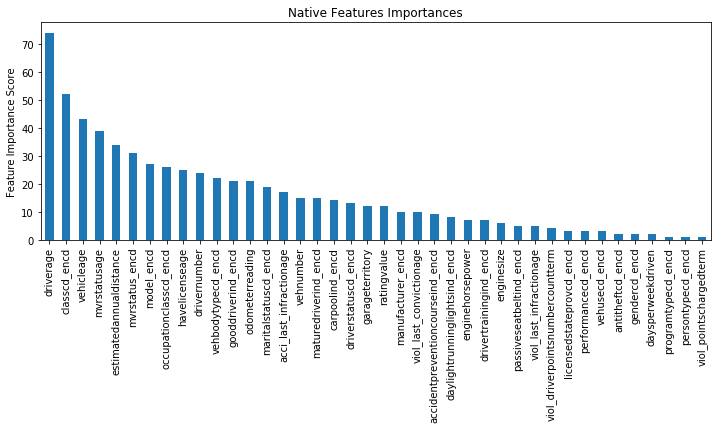

In [79]:
feat_imp = pd.Series(gbm.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='Native Features Importances')
plt.ylabel('Feature Importance Score')

In [80]:
print feat_imp
feat_imp.to_csv('C:\Kate\Python\ClaimPrediction\Results_v1\Output\XGB_Native_Features_Importance.csv')

driverage                           74
classcd_encd                        52
vehicleage                          43
mvrstatusage                        39
estimatedannualdistance             34
mvrstatus_encd                      31
model_encd                          27
occupationclasscd_encd              26
havelicenseage                      25
drivernumber                        24
vehbodytypecd_encd                  22
gooddriverind_encd                  21
odometerreading                     21
maritalstatuscd_encd                19
acci_last_infractionage             17
vehnumber                           15
maturedriverind_encd                15
carpoolind_encd                     14
driverstatuscd_encd                 13
garageterritory                     12
ratingvalue                         12
manufacturer_encd                   10
viol_last_convictionage             10
accidentpreventioncourseind_encd     9
daylightrunninglightsind_encd        8
enginehorsepower         

External Features replace make, model, enginesize and 4 in addition: vehicle height, width, length and model score which was calculated based on average premium per model and the same driver age and zip code.

In [81]:
X=dataset.loc[:,external_features]
y=dataset[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)
#
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

Random Undersampling
Removed 94633
Reduced 89.03%
47% of records in the dataset have claims
ROC_AUC - 0.645999
Gini - 0.300043


Confusion matrix

TP=846 FP=8442
FN=504 TN=16783


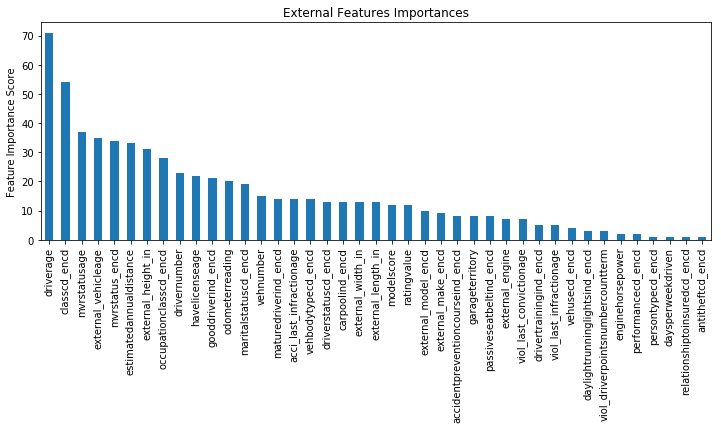

In [82]:
feat_imp = pd.Series(gbm.booster().get_fscore()).sort_values(ascending=False)
feat_imp.plot(kind='bar', title='External Features Importances')
plt.ylabel('Feature Importance Score')

In [83]:
print feat_imp
feat_imp.to_csv('C:\Kate\Python\ClaimPrediction\Results_v1\Output\XGB_External_Features_Importance.csv')

driverage                           71
classcd_encd                        54
mvrstatusage                        37
external_vehicleage                 35
mvrstatus_encd                      34
estimatedannualdistance             33
external_height_in                  31
occupationclasscd_encd              28
drivernumber                        23
havelicenseage                      22
gooddriverind_encd                  21
odometerreading                     20
maritalstatuscd_encd                19
vehnumber                           15
maturedriverind_encd                14
acci_last_infractionage             14
vehbodytypecd_encd                  14
driverstatuscd_encd                 13
carpoolind_encd                     13
external_width_in                   13
external_length_in                  13
modelscore                          12
ratingvalue                         12
external_model_encd                 10
external_make_encd                   9
accidentpreventioncoursei

It looks like the external features improves the metrics (vehicle height). 

In [84]:
X=dataset.loc[:,native_and_height_features]
y=dataset[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)
#
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

Random Undersampling
Removed 94633
Reduced 89.03%
47% of records in the dataset have claims
ROC_AUC - 0.644286
Gini - 0.297220


Confusion matrix

TP=841 FP=8435
FN=509 TN=16790


Ok, so height definetly improves the score but the other external features also play some role. Let's try to run the model with external features but without the height.

In [85]:
external_features.remove('external_height_in')

In [86]:
X=dataset.loc[:,external_features]
y=dataset[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)
#
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

Random Undersampling
Removed 94633
Reduced 89.03%
47% of records in the dataset have claims
ROC_AUC - 0.645695
Gini - 0.300037


Confusion matrix

TP=844 FP=8420
FN=506 TN=16805


Even without Height external features still have significant score. Let's try to run the model with external features but without modelscore

In [87]:
external_features.remove('modelscore')

In [88]:
X=dataset.loc[:,external_features]
y=dataset[target_column]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
#
X_res,y_res=Resampling(rus,X_train,y_train,'Random Undersampling')
    #to avoid too many too many indices for array error reshape to (len,) from (len,1)
l=len(y_res)
y_res=y_res[target_column].values.reshape(l,)
#
gbm = xgb.XGBClassifier(objective='binary:logistic').fit(X_res, y_res)
y_pred = gbm.predict(X_test)
y_pred[y_pred > 0.5] = 1
y_pred[y_pred <= 0.5] = 0
ROC_AUC=model_metrics(y_test, y_pred,0)

Random Undersampling
Removed 94633
Reduced 89.03%
47% of records in the dataset have claims
ROC_AUC - 0.647301
Gini - 0.302747


Confusion matrix

TP=847 FP=8395
FN=503 TN=16830


On the other hand, removing ModelScore from the external features makes the metrics even more higher. The question is if the improvement statistically significant. We will do more investigation for this.

I would say it is not enough just take into account feature significance. A feature can be significant according to this analysis but its removing may improve the score.